# DAT_SF_13 Midterm Homework 4

###About the data
For this midterm, you'll be working with a dataset related to classifying emails as spam. The dataset was built by researchers at the UCI Machine Learning Institute. The following link is for reference only; the spam dataset is included in our github repo, in the HW4 directory. _Be sure to use the dataset provided in our course github repo._

http://archive.ics.uci.edu/ml/datasets/Spambase

**Data Set Information:**

The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography...

**Attribute Information:**

The last column of 'spambase.data' denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters.

###Definitions of the attributes:

**48 continuous real [0,100] attributes of type word_freq_WORD**

= percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string.

**6 continuous real [0,100] attributes of type char_freq_CHAR**

= percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail

**1 continuous real [1,...] attribute of type capital_run_length_average**

= average length of uninterrupted sequences of capital letters

**1 continuous integer [1,...] attribute of type capital_run_length_longest**

= length of longest uninterrupted sequence of capital letters

**1 continuous integer [1,...] attribute of type capital_run_length_total**

= sum of length of uninterrupted sequences of capital letters = total number of capital letters in the e-mail

**1 nominal {0,1} class attribute of type spam**

= denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail.

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',60)

%matplotlib inline

In [13]:
# Load the spambase.csv as a pandas DataFrame (last column of data contains Target Data - is_spam)
spam_data = pd.read_csv("spambase.csv")

In [14]:
spam_data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0.00,0.64,0.64,0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0.00,0,0,0.00,0,0.00,0.00,0,0,0.00,0.000,0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0,0.43,0.43,0,0,0,0,0,0,0,0,0,0,0,0,0.07,0,0,0.00,0,0,0.00,0,0.00,0.00,0,0,0.00,0.132,0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0,1.16,0.06,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0.06,0,0,0.12,0,0.06,0.06,0,0,0.01,0.143,0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0.00,0,0,0.00,0,0.00,0.00,0,0,0.00,0.137,0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0.00,0,0,0.00,0,0.00,0.00,0,0,0.00,0.135,0,0.135,0.000,0.000,3.537,40,191,1


In [15]:
spam_data.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,0.059824,0.541702,0.093930,0.058626,0.049205,0.248848,0.142586,0.184745,1.662100,0.085577,0.809761,0.121202,0.101645,0.094269,0.549504,0.265384,0.767305,0.124845,0.098915,0.102852,0.064753,0.047048,0.097229,0.047835,0.105412,0.097477,0.136953,0.013201,0.078629,0.064834,0.043667,0.132339,0.046099,0.079196,0.301224,0.179824,0.005444,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,0.201545,0.861698,0.301036,0.335184,0.258843,0.825792,0.444055,0.531122,1.775481,0.509767,1.200810,1.025756,0.350286,0.442636,1.671349,0.886955,3.367292,0.538576,0.593327,0.456682,0.403393,0.328559,0.555907,0.329445,0.532260,0.402623,0.423451,0.220651,0.434672,0.349916,0.361205,0.766819,0.223812,0.621976,1.011687,0.911119,0.076274,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

In [16]:
spam_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4601 entries, 0 to 4600
Data columns (total 58 columns):
word_freq_make                4601 non-null float64
word_freq_address             4601 non-null float64
word_freq_all                 4601 non-null float64
word_freq_3d                  4601 non-null float64
word_freq_our                 4601 non-null float64
word_freq_over                4601 non-null float64
word_freq_remove              4601 non-null float64
word_freq_internet            4601 non-null float64
word_freq_order               4601 non-null float64
word_freq_mail                4601 non-null float64
word_freq_receive             4601 non-null float64
word_freq_will                4601 non-null float64
word_freq_people              4601 non-null float64
word_freq_report              4601 non-null float64
word_freq_addresses           4601 non-null float64
word_freq_free                4601 non-null float64
word_freq_business            4601 non-null float64
word_freq

###Exercise 1: Explore the dataset and display some visualizations showing how the variables relate to each other

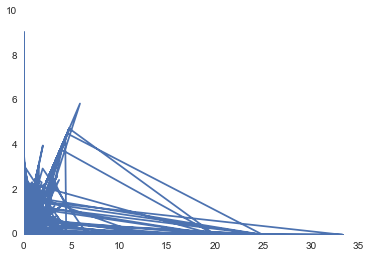

In [20]:
#your code here
#x='word_freq_george'
#y='word_freq_650'
#z='word_freq_technology'
x=spam_data.word_freq_george
y=spam_data.word_freq_650
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x,y)

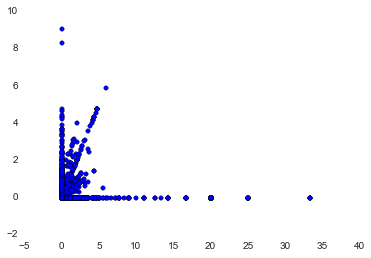

In [22]:
x=spam_data.word_freq_george
y=spam_data.word_freq_650
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x,y)

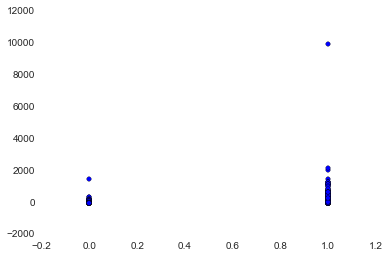

In [26]:
#char_freq_$ dollar sign throws an error, need to figure out how to handle this
x=spam_data.is_spam
y=spam_data.capital_run_length_longest
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x,y)

In [32]:
is_spam_capital_run = spam_data.capital_run_length_longest[spam_data.is_spam==1]
is_not_spam_capital_run = spam_data.capital_run_length_longest[spam_data.is_spam==0]

#x=spam_data.is_spam
#y=spam_data.capital_run_length_longest
#this doesn't work because a boxplot for x,y takes in values for two specific situations (e.g. average age of 
#women who survived titanic vs. average age of men who survived, not survival rates and gender) in order to properly 
#appear
is_spam_capital_run.head()

0     61
1    101
2    485
3     40
4     40
Name: capital_run_length_longest, dtype: int64

In [35]:
is_not_spam_capital_run.head()

1813     5
1814     2
1815     1
1816     7
1817    28
Name: capital_run_length_longest, dtype: int64

In [39]:
is_spam_capital_run.count()

1813

In [41]:
is_spam_capital_run.mean()

104.39327082184225

In [46]:
is_spam_capital_run.max()

9989

In [38]:
is_not_spam_capital_run.count()

2788

In [42]:
is_not_spam_capital_run.mean()

18.214490674318508

In [47]:
is_not_spam_capital_run.max()

1488

[<matplotlib.text.Text at 0x111a08510>, <matplotlib.text.Text at 0x1118761d0>]

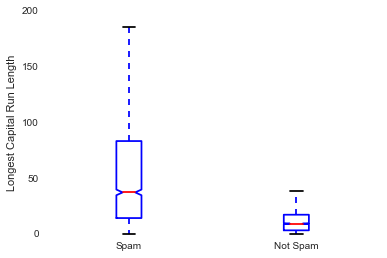

In [117]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot([is_spam_capital_run, is_not_spam_capital_run], ax.set_ylim([0,200]))
ax.set_ylabel('Longest Capital Run Length')
ax.set_xticklabels(['Spam','Not Spam'])
#why is the data squashed?

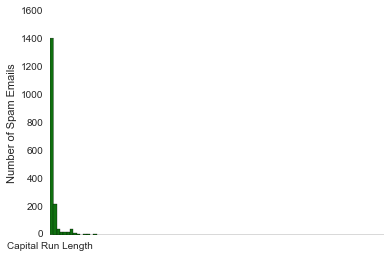

In [125]:
#histogram counts the number of occurences of a certain type of data (e.g. number of passengers in that age group
#vs. 30-40 or 20-30. Takes as input age data
fig = plt.figure()
ax = fig.add_subplot(111)
#By default, hist separates the data into 10 bins of equal widths and plots the number of observations in each bin. 
#Thus, the main parameter is the number of bins, which we can change e.g see changing to 9 below)
#what's strange is that even when I force it, it's only showing one result?
ax.hist(is_spam_capital_run,100, color=sns.desaturate("green", .75));
#color changes the color e.g. "indianred" or "yellow"
#unclear what the .75 does. Changing that appears to have no impact?
ax.set_ylabel('Number of Spam Emails')
ax.set_xticklabels(['Capital Run Length'])

In [121]:
is_spam_capital_run.max()

9989

In [123]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.sns.kdeplot(is_spam_capital_run.values, shade=True);`

SyntaxError: invalid syntax (<ipython-input-123-a838a35f31c5>, line 3)

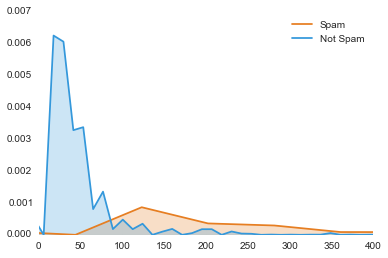

In [126]:
fig = plt.figure()
ax = fig.add_subplot(111)
sns.kdeplot(is_spam_capital_run.values, shade=True, color='#e67e22', label='Spam')
sns.kdeplot(is_not_spam_capital_run.values, shade=True, color='#3498db', label='Not Spam');
ax.set_xlim([0,400])
ax.legend(['Spam','Not Spam'])

###Exercise 2: Build a simple logistic regression and visualize it
use the variable "capital_run_length_longest" to predict "is_spam" How accurate is this single feature?

In [68]:
#your code here
#Logistic Regression is a statistical technique capable of predicting a binary outcome. Actually 
#doing the Logistic Regression is quite simple. Specify the column containing the variable you're
#trying to predict followed by the columns that the model should use to make the prediction.
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np

In [76]:
#couldn't find a good example of simple regression in labs, using this:
#http://blog.yhathq.com/posts/logistic-regression-and-python.html
#trying to figure out if captical run length is a good predictor of whether or not something
#is spam
logit = sm.Logit(spam_data['is_spam'], spam_data['capital_run_length_longest'])
#either above or below formatting works. When I accidentally reversed the x & y though,
#didn't work--maybe can't predict if not boolean? (0 or 1)?
#logit = sm.Logit(spam_data.is_spam, spam_data.capital_run_length_longest)

# fit the model
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.661246
         Iterations 7


In [77]:
print result.summary()
# there is a slightly positive relationship between the length of the longest capital length 
#run and whether or not something is spam. 

                           Logit Regression Results                           
Dep. Variable:                is_spam   No. Observations:                 4601
Model:                          Logit   Df Residuals:                     4600
Method:                           MLE   Df Model:                            0
Date:                Sun, 19 Apr 2015   Pseudo R-squ.:                 0.01384
Time:                        13:52:32   Log-Likelihood:                -3042.4
converged:                       True   LL-Null:                       -3085.1
                                        LLR p-value:                       nan
                                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
capital_run_length_longest     0.0069      0.001     12.155      0.000         0.006     0.008


In [78]:
print result.conf_int()
#I think this means that the length of capital letters is a better indicator
#of whether or not something is spam (1, 0.008043) vs. not spam (0, 0.005809)
#Thus, we're more confident about assigning something as spam based on the length of 
#capital letter run?

                                   0         1
capital_run_length_longest  0.005809  0.008043


In [81]:
#found a different formula in a different lab, giving that a shot
#import statsmodels.formula.api as smf
#this is similar to the package I imported above...but slightly different?
#lm = smf.ols(spam_data['is_spam'], spam_data['capital_run_length_longest'])
#fit = lm.fit()
#print fit.summary()
#hmm this did't work, hashing out

In [128]:
#trying a new method, found old lab
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1)
lr.fit(spam_data.capital_run_length_longest, spam_data.is_spam)

ValueError: X and y have incompatible shapes.
X has 1 samples, but y has 4601.

In [131]:
spam_data.capital_run_length_longest.head(10)

0     61
1    101
2    485
3     40
4     40
5     15
6      4
7     11
8    445
9     43
Name: capital_run_length_longest, dtype: int64

In [130]:
spam_data.is_spam.describe()

count    4601.000000
mean        0.394045
std         0.488698
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: is_spam, dtype: float64

###Exercise 3: Use train-test spit to split your data at a 30% mark and run another logistic regression using all variables
use random state = 12 so that we can compare results

In [97]:
#your code here
x_variables=spam_data.ix[:,:57]
#spam_data[::2].head()
x_variables.head(5)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0.00,0,0,0.00,0,0.00,0.00,0,0,0.00,0.000,0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0,0.43,0.43,0,0,0,0,0,0,0,0,0,0,0,0,0.07,0,0,0.00,0,0,0.00,0,0.00,0.00,0,0,0.00,0.132,0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0,1.16,0.06,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0.06,0,0,0.12,0,0.06,0.06,0,0,0.01,0.143,0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0.00,0,0,0.00,0,0.00,0.00,0,0,0.00,0.137,0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0.00,0,0,0.00,0,0.00,0.00,0,0,0.00,0.135,0,0.135,0.000,0.000,3.537,40,191


In [96]:
y_variables = spam_data.is_spam
y_variables.head(5)

0    1
1    1
2    1
3    1
4    1
Name: is_spam, dtype: int64

In [101]:
from sklearn.cross_validation import train_test_split
X = x_variables
y = y_variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [102]:
logit = sm.Logit(y_train,X_train)
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.206731
         Iterations 15


In [103]:
print result.summary()

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 3220
Model:                          Logit   Df Residuals:                     3163
Method:                           MLE   Df Model:                           56
Date:                Sun, 19 Apr 2015   Pseudo R-squ.:                  0.6928
Time:                        17:06:56   Log-Likelihood:                -665.67
converged:                       True   LL-Null:                       -2166.7
                                        LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            -0.6916      0.275     -2.511      0.012        -1.231    -0.152
x2            -0.2482      0.081     -3.056      0.002        -0.407    -0.089
x3            -0.1582      0.131     -1.212      0.2

In [ ]:
#do I now need to test it? Or build a model? unclear

###Exercise 4: Apply cross validation to see how the model fares across different splits of your data
Use cross validation to score your model

In [114]:
#your code here
from sklearn.cross_validation import cross_val_score
from sklearn import neighbors, datasets, feature_selection
#after running graph below to determine optimal # of neighbors, used 5. 
clf = neighbors.KNeighborsClassifier(5, weights='uniform')
clf.fit(x_variables, y_variables)
scores = cross_val_score(clf, x_variables, y_variables, cv=5)
print scores
print scores.mean()
#I'm not sure if this is right?

[ 0.74918567  0.78175896  0.81107492  0.80739935  0.71490751]
0.77286527985


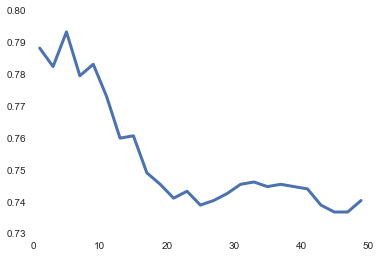

In [109]:
scores = []
n_neighbors = range(1, 51, 2)
for n in n_neighbors:
    clf = neighbors.KNeighborsClassifier(n)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))
plt.plot(n_neighbors, scores, linewidth=3.0)

In [112]:
scores.max()
#how do we get N_neighbors for highest score?

0.8030467899891186

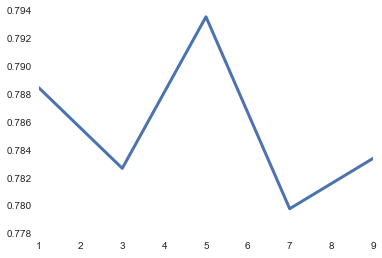

In [113]:
scores = []
n_neighbors = range(1, 10, 2)
for n in n_neighbors:
    clf = neighbors.KNeighborsClassifier(n)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))
plt.plot(n_neighbors, scores, linewidth=3.0)
#highest at 5. Re-run above using new score

###Exercise 5: Compare Performance of Logistic Regression to KNN with 3 neighbors
Which model is more accurate?

In [115]:
#KNN with 3 neighbors
from sklearn.cross_validation import cross_val_score
from sklearn import neighbors, datasets, feature_selection
clf = neighbors.KNeighborsClassifier(3, weights='uniform')
clf.fit(x_variables, y_variables)
scores = cross_val_score(clf, x_variables, y_variables, cv=5)
print scores
print scores.mean()
#oddly, this doesn't match what I'm seeing above on the graph. Specifically, it seems like 5 is the optimal number 
#of neighbors, but I'm getting a better result with 3? 

[ 0.77090119  0.78610206  0.82410423  0.80631121  0.69423286]
0.7763303123


In [116]:
#Logistic regression
logit = sm.Logit(y_variables,x_variables)
result = logit.fit()
#based on this, I think that KNN is a better model? Logistic regression doesn't seem to do a good job
#filtering out the noise. 

Optimization terminated successfully.
         Current function value: 0.212842
         Iterations 15


###Exercise 6: Evaluate Feature Importance
Which features are the most influential in this model?

In [ ]:
#your code here


###Exercise 7: Plot the ROC Curve for the logistic regression you chose¶

In [ ]:
#your code here

###Exercise 8: Demonstrate how the accurary of your predictions changes when you set your threshold to levels other than 50%

In [ ]:
#your code here

###Exercise 9: Discuss the pro's/con's of moving the threshold away from 50%, why is/isn't this a good idea?

In [ ]:
#your essay-style answer here